# Ejercicio 7

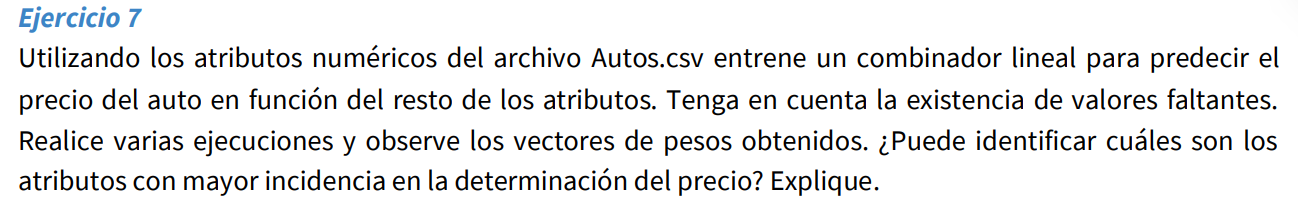

# Importe de librerias y lectura de datos

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns

# importa neurona lineal de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassNeuronaLineal import NeuronaLineal

nombre_archivo = DATOS_DIR + 'AUTOS.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

df

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,-1
201,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,-1
202,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,-1
203,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,-1


# Data Wrangling

Selecciono unicamente los atributos numericos (asi lo pide la consigna)

In [3]:
df = df.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])


### Tratamiento de datos nulos

In [4]:
df.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
symboling             0
dtype: int64

In [5]:
#calculo la media de los atributos que tienen nan
values = {'normalized-losses': df['normalized-losses'].mean(),
          'bore': df['bore'].mean(),
          'stroke': df['stroke'].mean(),
          'horsepower': df['horsepower'].mean(),
          'peak-rpm': df['peak-rpm'].mean(),
          'price': df['price'].mean()}

In [6]:
df = df.fillna(value=values)

### Matriz de correlacion

<Axes: >

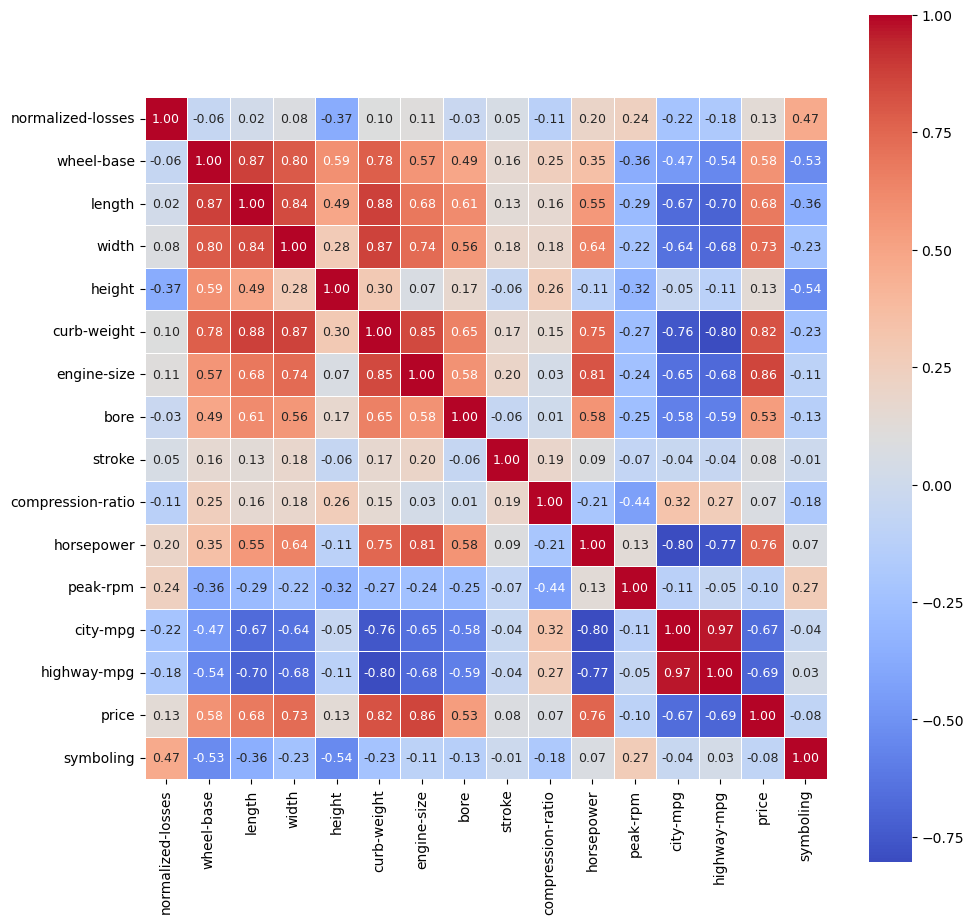

In [7]:
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, square=True,  annot=True, linewidths=.5, cmap='coolwarm', annot_kws={'fontsize':9}, fmt='.2f')

# Modelo

Se quiere predecir el precio del auto en funcion de los demas atributos numericos

In [8]:
df.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling
0,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,3
1,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,3
2,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2


In [9]:
Datos = np.array(df)
T = Datos[:,14].reshape(-1,1) #variable target
X = np.delete(Datos, [14], 1) #elimnino la variable target

In [10]:
df.columns.values

array(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'symboling'], dtype=object)

In [11]:
nombreAtributos = np.array(df.columns.values).reshape(-1,1)
nombreAtributos

array([['normalized-losses'],
       ['wheel-base'],
       ['length'],
       ['width'],
       ['height'],
       ['curb-weight'],
       ['engine-size'],
       ['bore'],
       ['stroke'],
       ['compression-ratio'],
       ['horsepower'],
       ['peak-rpm'],
       ['city-mpg'],
       ['highway-mpg'],
       ['price'],
       ['symboling']], dtype=object)

In [12]:
nombreTarget = nombreAtributos[14]
nombreColumnas = np.delete(nombreAtributos, [14])

### Normalizacion de datos

In [14]:
normalizador  =  preprocessing.StandardScaler()
X_normalizado = normalizador.fit_transform(X)

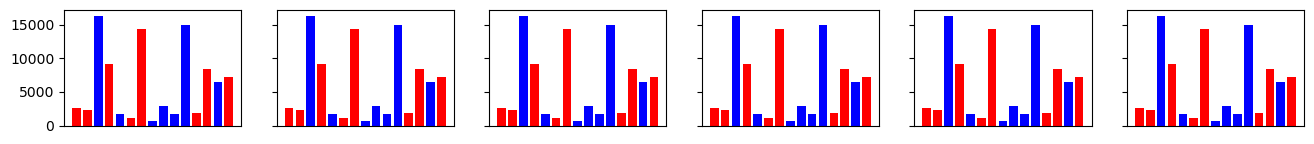

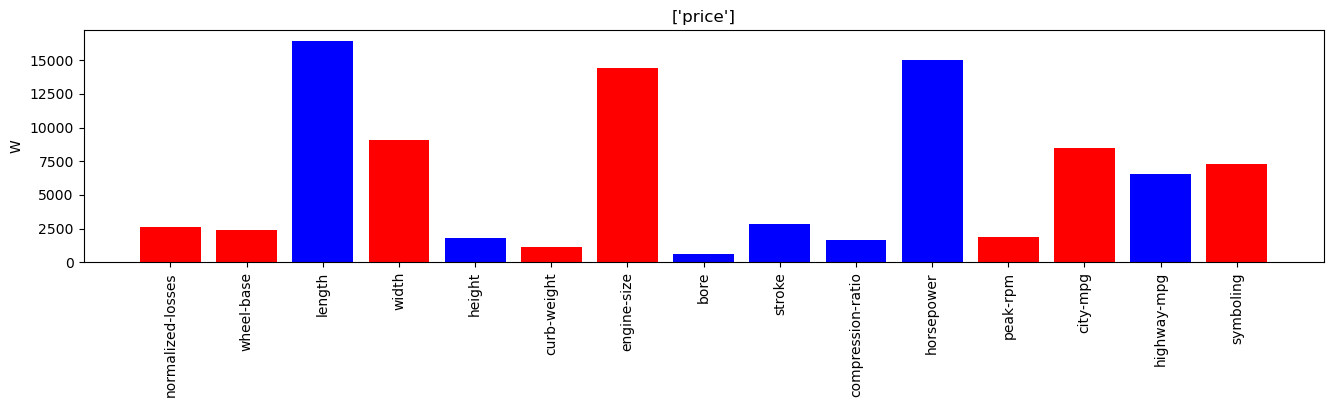

In [17]:
CANT_PLOTS = 6
alfa = 0.05
MAX_ITE = 200
CotaError = 10e-03

w_acc = np.zeros(len(nombreColumnas)) # acumulador para pesos

fig,subs=plt.subplots(1, CANT_PLOTS, sharex='col', sharey='row', figsize=(16,1.5))


for i in range(0, CANT_PLOTS):
    modelo = NeuronaLineal(alpha=alfa, n_iter=MAX_ITE, cotaE=CotaError)
    modelo.fit(X_normalizado, T)

    w_acc += modelo.w_ # acumula pesos para despues promediar

    # Colores para barras positivas y negativas. La idea es dibujarlas positivas
    # para comparar la magnitud y pintar de otro color las negativas
    colores = ['blue' if valor >= 0 else 'red' for valor in  modelo.w_]
    subs[i].bar(np.arange(len(modelo.w_)), np.abs(modelo.w_), color=colores)
    subs[i].set_xticks([])

w_prom = w_acc / CANT_PLOTS

# Color azul para barras positivas y rojo para negativas
colores = ['blue' if valor >= 0 else 'red' for valor in w_prom]

barras = np.abs(w_prom)
plt.figure(figsize=(16,4))
N=len(barras)

plt.bar(np.arange(N), barras, color=colores)   # Gráfico de barras
plt.title(nombreTarget)           # Colocamos el título
plt.ylabel('W')
plt.xticks(np.arange(N), nombreColumnas, rotation='vertical')
plt.subplots_adjust(bottom=0.3)
plt.show()

Los atributos con mayor incidencia en la determinacion del precio son: length, horsepower y engine-size